### This notebook should give you a minimal code to generate synthetic time series using the pretrained models after running stage1 and 2.

Prerequisite
- `stage1-dataset_name.ckpt` and `stage2-dataset_name.ckpt` must exist in `saved_models/`.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from evaluation.evaluation import Evaluation
from utils import load_yaml_param_settings

In [2]:
# settings
dataset_name = 'UWaveGestureLibraryAll'
n_samples = 100  # number of synthetic time series to sample
gpu_device_idx = 0
use_fidelity_enhancer = False

In [3]:
# fetch necessary data
config = load_yaml_param_settings(os.path.join('configs', 'config.yaml'))
df = pd.read_csv(os.path.join('datasets', 'DataSummary_UCR.csv'))
in_channels = 1  # univariate time series
input_length = int(df[df['Name'] == dataset_name]['Length'].values[0])
n_classes = int(df[df['Name'] == dataset_name]['Class'].values[0])

In [4]:
# load a model wrapper for the evaluation
evaluation = Evaluation(dataset_name, 
                        in_channels,
                        input_length, 
                        n_classes, 
                        gpu_device_idx, 
                        config, 
                        use_fidelity_enhancer=use_fidelity_enhancer,
                        ).to(gpu_device_idx)

self.X_train.shape: (3582, 1, 945)
self.X_test.shape: (896, 1, 945)
# unique labels (train): [0 1 2 3 4 5 6 7]
# unique labels (test): [0 1 2 3 4 5 6 7]
self.X_train.shape: (3582, 1, 945)
self.X_test.shape: (896, 1, 945)
# unique labels (train): [0 1 2 3 4 5 6 7]
# unique labels (test): [0 1 2 3 4 5 6 7]


sampling...


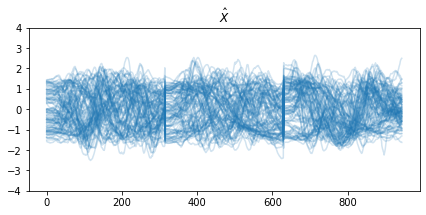

In [5]:
# unconditional sampling
# xhat_R == xhat if `use_fidelity_enhancer` is False
# xhat_R == FE(xhat) if `use_fidelity_enhancer` is True
(_, _, xhat), xhat_R = evaluation.sample(n_samples, 'unconditional')

ylim = (-4, 4)
plt.figure(figsize=(7,3))
plt.plot(xhat[:,0,:].T, color='C0', alpha=0.2)
plt.title(r'$\hat{X}$')
plt.ylim(*ylim)
plt.show()

if use_fidelity_enhancer:
    plt.figure(figsize=(7,3))
    plt.plot(xhat_R[:,0,:].T, color='C0', alpha=0.2)
    plt.title(r'$\hat{X}_R$')
    plt.ylim(*ylim)
    plt.show()

sampling...


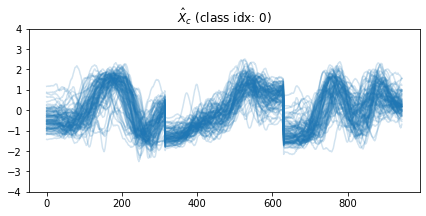

In [6]:
# class-conditional sampling
# xhat_R == xhat if `use_fidelity_enhancer` is False
# xhat_R == FE(xhat) if `use_fidelity_enhancer` is True
class_index = 0
(_, _, xhat), xhat_R = evaluation.sample(n_samples, 'conditional', class_index)

plt.figure(figsize=(7,3))
plt.plot(xhat[:,0,:].T, color='C0', alpha=0.2)
plt.title(r'$\hat{X}_c$' + ' ' + f'(class idx: {class_index})')
plt.ylim(*ylim)
plt.show()

if use_fidelity_enhancer:
    plt.figure(figsize=(7,3))
    plt.plot(xhat_R[:,0,:].T, color='C0', alpha=0.2)
    plt.title(r'$\hat{X}_R$' + ' ' + f'(class idx: {class_index})')
    plt.ylim(*ylim)
    plt.show()